In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# bring in the data sources
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [3]:
# combine the DataFrames
rawData_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

# preview the raw DataFrame
rawData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Prepare the Data

In [4]:
# display the count of unique Mouse IDs
print(f"The given dataset contains {rawData_df.nunique()['Mouse ID']} unique instances of Mouse ID.")

The given dataset contains 249 unique instances of Mouse ID.


In [5]:
# check for duplicated timepoints

# create a list of the unique Mouse IDs
uniqueMice = rawData_df['Mouse ID'].unique().tolist()

# create a list of the Mouse IDs
allMice = rawData_df['Mouse ID'].tolist()

# create a copy of the raw data
cleanData_df = rawData_df.copy(deep=True)

# iterate through the list
for mouse in uniqueMice:
    
    # create a DataFrame from the raw data where the Mouse ID matches the iterator
    mouse_df = rawData_df.loc[rawData_df['Mouse ID'] == mouse, :]
    
    # get the maximum count of repeated Timepoint values
    timepoint_duplicate = max(mouse_df['Timepoint'].value_counts().tolist())
    
    # if the count is greater than 1, there is a duplicate
    if timepoint_duplicate > 1:
        print(f'The Mouse ID, {mouse}, contains {timepoint_duplicate}x duplicated Timepoint data.')
        print()
        print(mouse_df.head())
        
        # remove the affected Mouse ID from the raw data
        cleanData_df = cleanData_df.loc[cleanData_df['Mouse ID'] != mouse, :]

The Mouse ID, g989, contains 2x duplicated Timepoint data.

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  


In [6]:
# display the cleaned count of unique Mouse IDs
print(f"The cleaned dataset contains {cleanData_df.nunique()['Mouse ID']} unique instances of Mouse ID.")

The cleaned dataset contains 248 unique instances of Mouse ID.


## Generate Summary Statistics

In [7]:
# create the statistical groups
groupedData_mean = cleanData_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_median = cleanData_df.groupby(["Mouse ID"]).median()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_std = cleanData_df.groupby(["Mouse ID"]).std()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_var = cleanData_df.groupby(["Mouse ID"]).var()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_sem = cleanData_df.groupby(["Mouse ID"]).sem()["Tumor Volume (mm3)"].map("{:,.2f}".format)

In [8]:
# because the five stats groups were grouped by the same column, their index columns will be identical
summary0_df = pd.DataFrame({
            "Mean": groupedData_mean,
            "Median": groupedData_median,
            "St.Dev": groupedData_std,
            "Variance": groupedData_var,
            "SEM": groupedData_sem})

# display 10 first entries of the first statistical summary DataFrame
summary0_df.head(10)

,Mean,Median,St.Dev,Variance,SEM
Mouse ID,,,,,
a203,56.31,55.98,7.10,50.41,2.25
a251,55.24,55.94,7.19,51.74,2.27
a262,58.61,58.57,9.21,84.76,2.91
a275,52.77,52.04,6.03,36.32,1.91
a366,54.64,55.27,6.20,38.42,2.34
a401,54.00,53.21,7.23,52.26,2.29
a411,40.70,39.99,2.61,6.84,0.83
a444,43.06,42.89,1.12,1.26,0.35
a457,47.42,47.46,2.39,5.72,1.38


In [9]:
# recreate the 'summary0_df' DataFrame using the pd.DataFrame.agg method in a single line of code
summary1_df = cleanData_df.agg({"Tumor Volume (mm3)": ["mean", "median", "std", "var", "sem"]}).round(2)
summary1_df.head()

,Tumor Volume (mm3)
mean,50.44
median,48.93
std,8.91
var,79.46
sem,0.21


## Create Bar Charts and a Pie Chart

In [10]:
timePoints_df = cleanData_df["Timepoint"].value_counts()

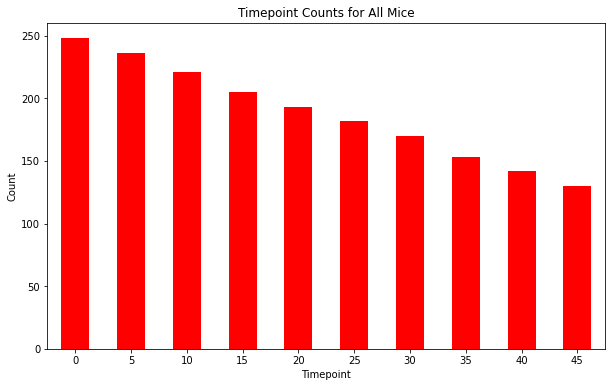

In [11]:
# create one bar chart using DataFrame.plot
figure1 = timePoints_df.plot(
                        kind="bar",
                        facecolor="red",
                        figsize=(10,6),
                        width=0.5,
                        rot=0,
                        title="Timepoint Counts for All Mice",
                        xlabel="Timepoint",
                        ylabel="Count")
plt.show()

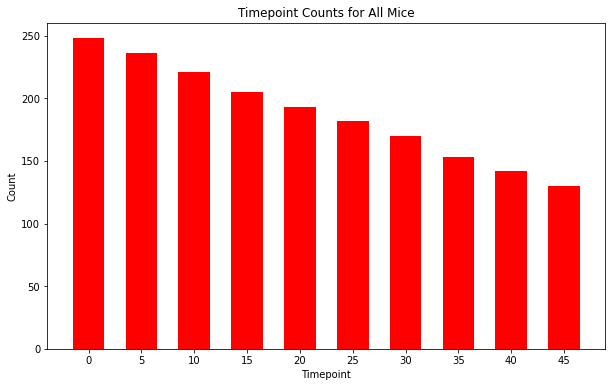

In [12]:
# create one bar chart using plt.bar
plt.figure(figsize=(10,6))
plt.bar(timePoints_df.keys(), timePoints_df.tolist(), color="red", align="center", width=3)
plt.xticks([value for value in timePoints_df.keys()])
plt.title("Timepoint Counts for All Mice")
plt.xlabel("Timepoint")
plt.ylabel("Count")
plt.show()

In [13]:
mouseSexes_df = cleanData_df['Sex'].value_counts()

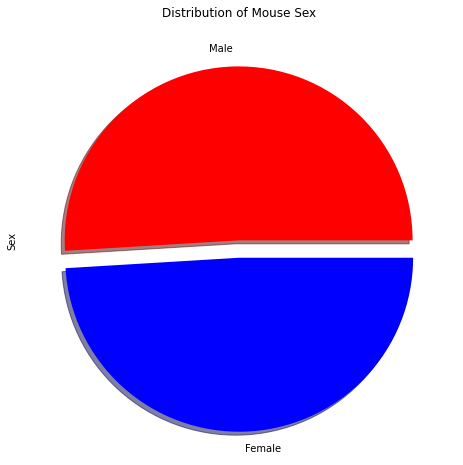

In [14]:
# create one pie chart using DataFrame.plot
figure2 = mouseSexes_df.plot(
                        kind="pie",
                        explode=[0, 0.1],
                        colors=["red", "blue"],
                        shadow=True,
                        title="Distribution of Mouse Sex",
                        figsize=(8,8))
plt.show()

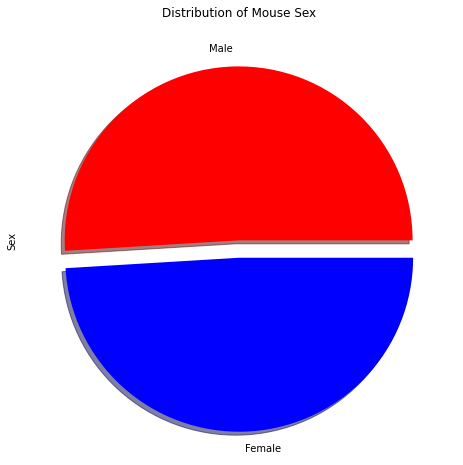

In [15]:
# create one pie chart using plt.pie
plt.figure(figsize=(8,8))
plt.pie(mouseSexes_df.tolist(), explode=[0, 0.1], labels=mouseSexes_df.keys(), colors=["red", "blue"], shadow=True)
plt.title("Distribution of Mouse Sex")
plt.ylabel("Sex")
plt.show()

## Calculate Quartiles, Find Outliers, and Create a Box Plot

In [ ]:
treatments = ["Capomulin", "Ramicane", "Infobinol", "Ceftamin"]
